# Statistics on King County Data #

## Importing Data and Setting up ##

Let's import all the packages and functions we have in file `functions_1`.

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import sys
import os
path_to_src = os.path.join('../../', 'src')
sys.path.insert(0, path_to_src)
from functions_1 import *

Import data from the csv file created in the `eda_notebook`.

In [7]:
residential_df = pd.read_csv('../../data/processed/clean_merged_data.csv', dtype=str)
residential_df.head()

,DocumentDate,ExciseTaxNbr,Major,Minor,SalePrice,RecordingNbr,PropertyType,PrincipalUse,AFForestLand,AFCurrentUseLand,...,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition,Condition
0,2019-12-20,3027422,213043,0120,560000.0,20191226000848,11,6,N,N,...,2,1,0,0,0,1989,0,0,0,3
1,2019-07-22,3002257,940652,0630,435000.0,20190730001339,11,6,N,N,...,1,0,1,0,0,1994,0,0,0,3
2,2019-06-04,2993601,140281,0020,450000.0,20190614000489,3,6,N,N,...,2,1,0,0,0,1986,0,0,0,3
3,2019-09-27,3015264,124550,0098,193000.0,20191015000395,3,6,N,N,...,1,0,1,0,0,1980,0,0,0,3
4,2019-03-27,2980648,797320,2320,540000.0,,3,6,N,N,...,1,1,0,0,0,1930,0,0,0,5


We want to know the house projects that will increase the value of a house. So for the sake of simplicity, we will concentrate on residential homes.

In [8]:
residential_df = residential_df[residential_df['PropertyType']=='11']
residential_df.head()

,DocumentDate,ExciseTaxNbr,Major,Minor,SalePrice,RecordingNbr,PropertyType,PrincipalUse,AFForestLand,AFCurrentUseLand,...,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition,Condition
0,2019-12-20,3027422,213043,0120,560000.0,20191226000848,11,6,N,N,...,2,1,0,0,0,1989,0,0,0,3
1,2019-07-22,3002257,940652,0630,435000.0,20190730001339,11,6,N,N,...,1,0,1,0,0,1994,0,0,0,3
8,2019-04-04,2982060,347050,0040,648500.0,,11,6,N,N,...,2,1,0,0,0,2005,0,0,0,3
9,2019-10-30,3020690,345960,0230,1255000.0,20191114001849,11,6,N,N,...,1,0,1,0,1,1978,0,0,0,5
10,2019-03-04,2976405,030200,0645,380000.0,20190306000786,11,6,N,N,...,1,0,1,0,1,1963,0,0,0,2


We have chosen some of the columns that seem to have continuous data and we are choosing these to find which data is correlated with our target variable `SalePrice`.

In [9]:
continuous_data = ['SalePrice', 'SqFtLot', 'NbrLivingUnits', 'Stories',
              'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
              'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf',
              'SqFtTotLiving','SqFtTotBasement','SqFtFinBasement',
              'SqFtGarageBasement','SqFtGarageAttached','SqFtOpenPorch',
              'SqFtEnclosedPorch','SqFtDeck','Bedrooms','BathHalfCount',
              'Bath3qtrCount','BathFullCount','YrBuilt','YrRenovated',
              'PcntComplete','PcntNetCondition']

Since the data is in `str` format, we have to set it as a numerical value to get correlation. In this instance, we will set it as `float`.

In [10]:
residential_df = residential_df[continuous_data]
residential_df = residential_df.astype(float)

In [11]:
residential_df.describe()

,SalePrice,SqFtLot,NbrLivingUnits,Stories,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,...,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition
count,1.880700e+04,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,...,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.00000,18807.000000,18807.000000,18807.000000
mean,7.968769e+05,15484.884617,1.009305,1.515127,1272.066784,45.922050,513.740469,12.960547,0.698144,0.539267,...,5.435263,136.979795,3.424682,0.483543,0.516138,1.578880,1974.66454,99.426490,0.300580,0.005370
std,5.910938e+05,39817.767674,0.108005,0.533691,500.122767,167.597449,661.340574,88.268310,23.828205,16.884691,...,36.728329,213.239317,0.923970,0.532005,0.655268,0.700675,30.42729,434.721742,4.950933,0.381457
min,1.000000e+01,375.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.00000,0.000000,0.000000,0.000000
25%,4.712590e+05,5048.500000,1.000000,1.000000,960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1954.00000,0.000000,0.000000,0.000000
50%,6.590000e+05,7600.000000,1.000000,1.500000,1210.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1978.00000,0.000000,0.000000,0.000000
75%,9.100000e+05,10800.000000,1.000000,2.000000,1499.000000,0.000000,1020.000000,0.000000,0.000000,0.000000,...,0.000000,220.000000,4.000000,1.000000,1.000000,2.000000,2001.00000,0.000000,0.000000,0.000000
max,1.605000e+07,897336.000000,3.000000,3.500000,6923.000000,2160.000000,5110.000000,1800.000000,1350.000000,920.000000,...,1840.000000,2250.000000,13.000000,5.000000,6.000000,7.000000,2020.00000,2020.000000,100.000000,40.000000


## Let's get the correlation ##

Let's make a correlation heatmap using `Seaborn's` handy plot.

<AxesSubplot:>

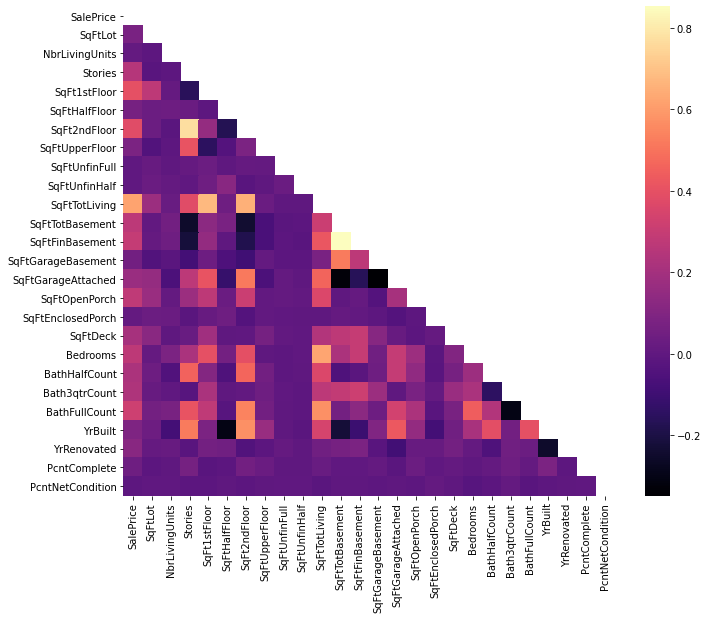

In [55]:
corr = residential_df.corr()

mask = np.triu(np.ones_like(corr, dtype=float))
fig1, ax1 = plt.subplots(figsize=(11,9))
sns.heatmap(corr, mask = mask, ax=ax1, cmap='magma')

Using the heatmap, we can see thre are various features that seem to have some correlation with `SalePrice` based on color. But let's visualize the data using a pairplot.

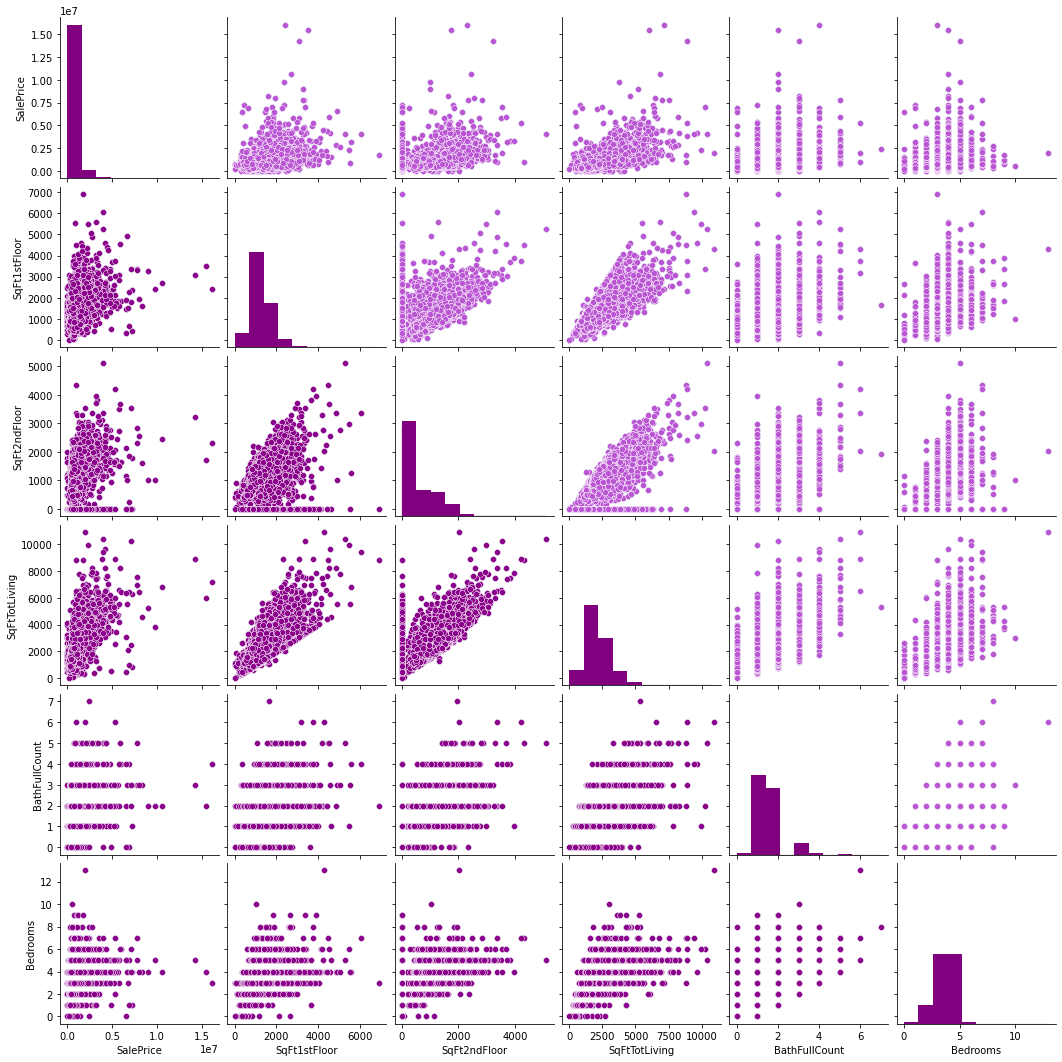

In [76]:
corr_columns = ['SalePrice','SqFt1stFloor','SqFt2ndFloor','SqFtTotLiving','BathFullCount','Bedrooms']
corr_df = residential_df[corr_columns]
g = sns.pairplot(corr_df)
g.map_upper(sns.scatterplot, color='mediumorchid')
g.map_lower(sns.scatterplot, color='darkmagenta')
g.map_diag(plt.hist, color= 'purple')


Since `BathFullCount` seems to be categorical or discreet. For the moment we will concentrate on the models of the continuous data.

## Simple Linear Models ##

### Model 1 ###

Using a predefined function `model`, we will get the ols model of different features and how it relates to the `SalePrice` variable.

In the first model we will be using `SqFtTotLiving`.

In [14]:
frml_sale_totsq = 'SalePrice ~ SqFtTotLiving'
model(frml_sale_totsq, residential_df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.187e+04
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:17:51   Log-Likelihood:            -2.7203e+05
No. Observations:               18807   AIC:                         5.441e+05
Df Residuals:                   18805   BIC:                         5.441e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.591e+04   8189.002     -1.942      0.052    -3.2e+04     144.477
SqFtTotLiving   378.6638      3.476    108.935      0.000     371.850     385.477
==============================================================================
Omnibus:                    24151.837   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12404873.130
Skew:                           6.729   Prob(JB):                         0.00
Kurtosis:                     128.096   Cond. No.                     5.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting ###

It appears that the `SqFtTotLiving` feature explains around 39% of the variance. The p-value is pretty small and the F-statistic seems to be fairly large. Therefore, we can conclude that our regression model fits the data better than the model with no independent variables.

To verify this we will perform a `t-test`.

In [15]:
sales_array = np.array(residential_df['SalePrice'])
tot_living_array = np.array(residential_df['SqFtTotLiving'])
print(tot_living_array, sales_array)

[1930. 1975. 3300. ... 2250. 6390.  440.] [ 560000.  435000.  648500. ...  745000. 6500000. 6500000.]


/Users/edgarbarron/opt/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/edgarbarron/opt/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


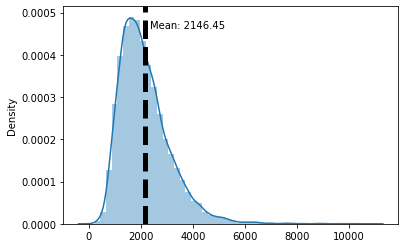

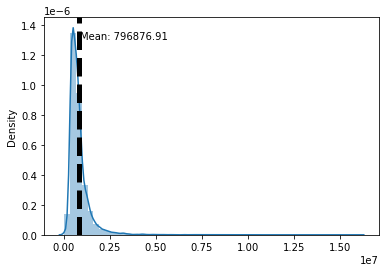

In [81]:
plot_distribution(tot_living_array)
plot_distribution(sales_array)
plt.show()

/Users/edgarbarron/opt/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/edgarbarron/opt/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


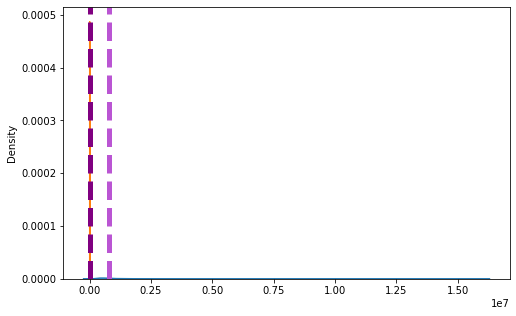

In [82]:
plt.figure(figsize= (8,5))
ax1 = sns.distplot(sales_array)
ax2 = sns.distplot(tot_living_array)
plt.axvline(np.mean(sales_array), color='mediumorchid', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(tot_living_array), color='purple', linestyle='dashed', linewidth=5)
plt.show()

Since our data points `SalePrice` & `SqFtTotLiving` differ vastly in scale, it is hard to see the actual plot.

Let's get down to the nitty-gritty numbers and compare the 2 data distributions.

In [18]:
np.random.seed(20)
sample_size = 20
sale_price_rnd = np.random.choice(sales_array, sample_size)
totliving_rnd = np.random.choice(tot_living_array, sample_size)
compare_groups(sale_price_rnd, totliving_rnd, 0.05, sample_size)

'Statistics=5.977, p=0.000'

Since the p-value is lower than the .05 alpha value, the data distribution is significant. 

### Model 2 ###

In the second model we will be using `SqFt1stFloor`.

In [19]:
frml_sale_1stflr = 'SalePrice ~ SqFt1stFloor'

In [20]:
model(frml_sale_1stflr, residential_df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     3614.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:17:52   Log-Likelihood:            -2.7497e+05
No. Observations:               18807   AIC:                         5.499e+05
Df Residuals:                   18805   BIC:                         5.500e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.932e+05   1.08e+04     17.909      0.000    1.72e+05    2.14e+05
SqFt1stFloor   474.5492      7.893     60.119      0.000     459.077     490.021
==============================================================================
Omnibus:                    22341.166   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7052050.143
Skew:                           5.955   Prob(JB):                         0.00
Kurtosis:                      97.114   Cond. No.                     3.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting ###

It appears that the `SqFt1stFloor` feature explains around 16% of the variance. The p-value is 0 and the F-statistic seems to be fairly large. Therefore, we can conclude that our regression model fits the data better than the model with no independent variables.

To verify this we will perform a t-test.

In [21]:
sqFt1st_array = np.array(residential_df['SqFt1stFloor'])
print(sqFt1st_array, sales_array)

[1930. 1057. 1390. ...  840. 1880.  350.] [ 560000.  435000.  648500. ...  745000. 6500000. 6500000.]


/Users/edgarbarron/opt/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/edgarbarron/opt/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


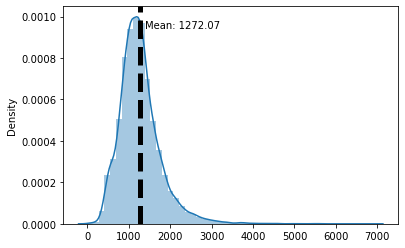

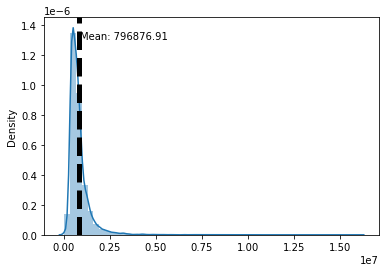

In [22]:
plot_distribution(sqFt1st_array)
plot_distribution(sales_array)
plt.show()

/Users/edgarbarron/opt/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/edgarbarron/opt/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


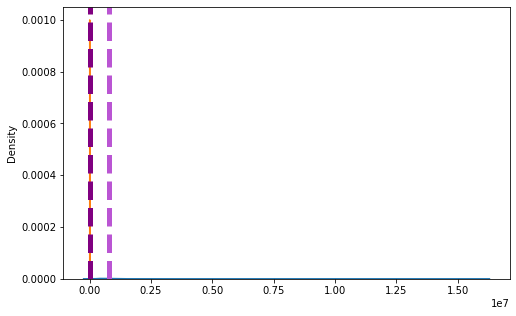

In [83]:
plt.figure(figsize= (8,5))
ax1 = sns.distplot(sales_array)
ax2 = sns.distplot(sqFt1st_array)
plt.axvline(np.mean(sales_array), color='mediumorchid', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(sqFt1st_array), color='purple', linestyle='dashed', linewidth=5)
plt.show()

Since our data points `SalePrice` & `sqFt1st_array` differ vastly in scale, it is hard to see the actual plot.

Let's get down to the nitty-gritty numbers and compare the 2 data distributions.

In [24]:
np.random.seed(20)
sample_size = 20
sale_price_rnd = np.random.choice(sales_array, sample_size)
sqFt1st_rnd = np.random.choice(sqFt1st_array, sample_size)
compare_groups(sale_price_rnd, sqFt1st_rnd, 0.05, sample_size)

'Statistics=5.985, p=0.000'

Since the p-value is lower than the .05 alpha value, the data distribution is significant. 

### Model 3 ###

In the second model we will be using `SqFt2ndFloor`.

In [25]:
frml_sale_2ndflr = 'SalePrice ~ SqFt2ndFloor'

In [26]:
model(frml_sale_2ndflr, residential_df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     3230.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:17:53   Log-Likelihood:            -2.7514e+05
No. Observations:               18807   AIC:                         5.503e+05
Df Residuals:                   18805   BIC:                         5.503e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.211e+05   5042.244    123.177      0.000    6.11e+05    6.31e+05
SqFt2ndFloor   342.1774      6.021     56.829      0.000     330.375     353.979
==============================================================================
Omnibus:                    22898.024   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7476430.092
Skew:                           6.233   Prob(JB):                         0.00
Kurtosis:                      99.878   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting ##

It appears that the `SqFt2ndFloor` feature explains around 14% of the variance. The p-value is 0 and the F-statistic seems to be fairly large. Therefore, we can conclude that our regression model fits the data better than the model with no independent variables.

To verify this we will perform a t-test.

In [27]:
sqFt2nd_array = np.array(residential_df['SqFt2ndFloor'])
print(sqFt1st_array, sales_array)

[1930. 1057. 1390. ...  840. 1880.  350.] [ 560000.  435000.  648500. ...  745000. 6500000. 6500000.]


/Users/edgarbarron/opt/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/edgarbarron/opt/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


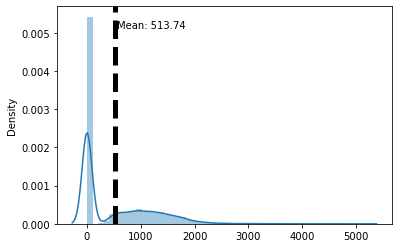

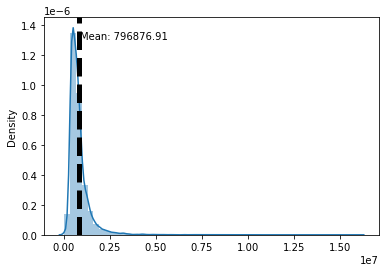

In [28]:
plot_distribution(sqFt2nd_array)
plot_distribution(sales_array)
plt.show()

There does appear to be alot of outlier data at value 0. We will take care of it after we get out t-value.

/Users/edgarbarron/opt/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/edgarbarron/opt/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


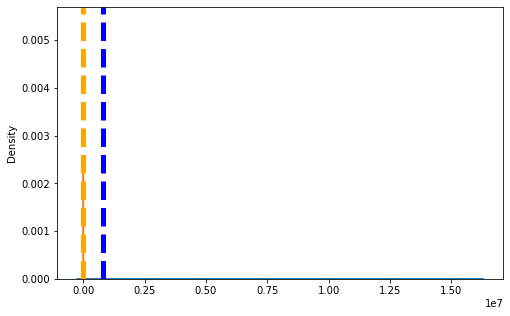

In [29]:
plt.figure(figsize= (8,5))
ax1 = sns.distplot(sales_array)
ax2 = sns.distplot(sqFt2nd_array)
plt.axvline(np.mean(sales_array), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(sqFt2nd_array), color='orange', linestyle='dashed', linewidth=5)
plt.show()

Since our data points `SalePrice` & `sqFt2nd_array` differ vastly in scale, it is hard to see the actual plot.

Let's get down to the nitty-gritty numbers and compare the 2 data distributions.

In [30]:
np.random.seed(20)
sample_size = 20
sale_price_rnd = np.random.choice(sales_array, sample_size)
sqft2nd_rnd = np.random.choice(sqFt2nd_array, sample_size)
compare_groups(sale_price_rnd, sqft2nd_rnd, 0.05, sample_size)

'Statistics=5.991, p=0.000'

Since the p-value is lower than the .05 alpha value, the data distribution is significant. 

Based on the 3 models and t-test values that we got, all 3 features seem to have a significant impact on the `SalePrice`, however, none of the models give great regression statistics nor seem to follow the normality characteristics.

Now we will engineer some features and create a couple of multiple linear regression models. We will also be checking the linear assumptions for these.

## Feature Engineering ##

The feature we will be engineering will be the 1st and 2nd floor measurements. To do this, we will multiply the values of each column with their respective rows and getting the square root of the value and assigning it to a respective column.
We will remove outlier data where `SqFt2ndFloor` = 0.

In [31]:
second_floor_no_0 = residential_df[residential_df['SqFt2ndFloor']!=0]
second_floor_no_0.head()

,SalePrice,SqFtLot,NbrLivingUnits,Stories,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,...,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition
1,435000.0,7392.0,1.0,2.0,1057.0,0.0,918.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,2.0,1.0,1994.0,0.0,0.0,0.0
8,648500.0,5250.0,1.0,2.0,1390.0,0.0,1910.0,0.0,0.0,0.0,...,0.0,0.0,5.0,1.0,0.0,2.0,2005.0,0.0,0.0,0.0
15,1450000.0,6000.0,1.0,2.5,930.0,460.0,1520.0,0.0,0.0,0.0,...,0.0,500.0,4.0,2.0,0.0,3.0,2018.0,0.0,0.0,0.0
16,1450000.0,6000.0,1.0,2.0,490.0,0.0,490.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,2018.0,0.0,0.0,0.0
17,785000.0,1313.0,1.0,2.0,580.0,0.0,610.0,0.0,0.0,0.0,...,0.0,110.0,3.0,1.0,2.0,1.0,1998.0,0.0,0.0,0.0


In [32]:
second_floor_no_0['sqfeet_feature'] = np.sqrt((second_floor_no_0['SqFt1stFloor'] * second_floor_no_0['SqFt2ndFloor']))
second_floor_no_0['sqfeet_feature']

<ipython-input-32-523b9cf01c0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_floor_no_0['sqfeet_feature'] = np.sqrt((second_floor_no_0['SqFt1stFloor'] * second_floor_no_0['SqFt2ndFloor']))


1         985.051268
8        1629.386388
15       1188.949116
16        490.000000
17        594.810894
            ...     
29929    1109.684640
29933    3214.670901
29936    2006.368859
29940    1088.301429
29941    2005.791614
Name: sqfeet_feature, Length: 8383, dtype: float64

When removing the 0's of based on feature `SqFt2ndFloor`, we were left with 8383, a more moderate data size.

Let's see if engineering this feature can help us get better statistics.

In [33]:
price_feet_feature = 'SalePrice ~ sqfeet_feature'
model(price_feet_feature, second_floor_no_0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     2813.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:17:55   Log-Likelihood:            -1.2382e+05
No. Observations:                8383   AIC:                         2.476e+05
Df Residuals:                    8381   BIC:                         2.477e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.184e+04   1.86e+04      2.252      0.024    5425.428    7.83e+04
sqfeet_feature   783.3068     14.768     53.041      0.000     754.358     812.256
==============================================================================
Omnibus:                    10241.859   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3067583.261
Skew:                           6.275   Prob(JB):                         0.00
Kurtosis:                      95.870   Cond. No.                     3.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpreting ##

Based on the results of the model, it appears that the engineered feature `sqfeet_feature` only helps explain 25% of the data. However, based on p-value and f-statistic, the data still seems to be significant.

However the Jarque-Bera statistic still seems really high. Let's try logging the data with `np.log` to see if we can obtain some normality. Before that, let's look at the distribution of the data.

/Users/edgarbarron/opt/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

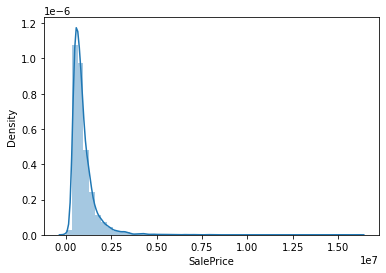

In [34]:
sns.distplot(second_floor_no_0['SalePrice'])

Distribution plot for `SalePrice` appears to be normally distributed.

/Users/edgarbarron/opt/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqfeet_feature', ylabel='Density'>

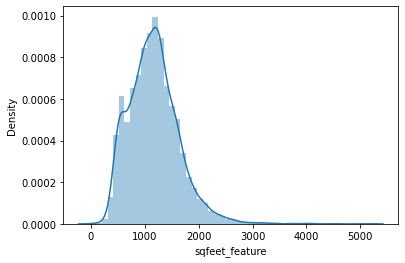

In [35]:
sns.distplot(second_floor_no_0['sqfeet_feature'])

Distribution plot for `sqfeet_feature` appears to have some sense of normality. Let's see if anything changes when logging.

In [36]:
second_floor_no_0['log_sqfeet_feature'] = np.log(second_floor_no_0['sqfeet_feature'])
second_floor_no_0['log_sqfeet_feature']

<ipython-input-36-b9cf217301b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_floor_no_0['log_sqfeet_feature'] = np.log(second_floor_no_0['sqfeet_feature'])


1        6.892694
8        7.395959
15       7.080825
16       6.194405
17       6.388244
           ...   
29929    7.011831
29933    8.075480
29936    7.604082
29940    6.992373
29941    7.603794
Name: log_sqfeet_feature, Length: 8383, dtype: float64

Let's look at the distribution of the logged `sqfeet_feature` data.

/Users/edgarbarron/opt/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_sqfeet_feature', ylabel='Density'>

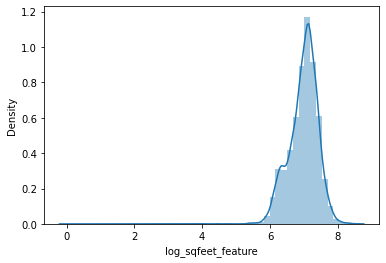

In [37]:
sns.distplot(second_floor_no_0['log_sqfeet_feature'])

The 1st curve definitely seems to be lower in the curve of the distribution and it also appears to have some negative skew. Let's put it in our model to see if we get better statistics.

In [38]:
log_price_feet_feature = 'SalePrice ~ log_sqfeet_feature'
model(log_price_feet_feature, second_floor_no_0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     1740.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:17:59   Log-Likelihood:            -1.2424e+05
No. Observations:                8383   AIC:                         2.485e+05
Df Residuals:                    8381   BIC:                         2.485e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.996e+06   1.19e+05    -33.585      0.000   -4.23e+06   -3.76e+06
log_sqfeet_feature  7.096e+05    1.7e+04     41.708      0.000    6.76e+05    7.43e+05
==============================================================================
Omnibus:                    10191.655   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2793332.081
Skew:                           6.253   Prob(JB):                         0.00
Kurtosis:                      91.548   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting ###

 This logged data did not seem to improve our linear model and definitely seemed to worsen our linear assumption statistics. It appears as though the logged `sqfeet_feature` only represents 17% of the data.

## Multiple Linear Model ##

Let's add more features to the model using `SqFtTotLiving` since that one seemed to encompass 38% of the data, the highest R-squared model we have. For this, we will use the `sqfeet_feature` since we got a high R stat on that model.

In [39]:
tot_sqfeet = 'SalePrice ~ SqFtTotLiving + sqfeet_feature'
multiple_linear_model = ols(formula =tot_sqfeet, data = second_floor_no_0)
results = multiple_linear_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     3074.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:18:00   Log-Likelihood:            -1.2273e+05
No. Observations:                8383   AIC:                         2.455e+05
Df Residuals:                    8380   BIC:                         2.455e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -1.29e+05   1.67e+04     -7.745      0.000   -1.62e+05   -9.64e+04
SqFtTotLiving    707.9467     14.169     49.964      0.000     680.172     735.722
sqfeet_feature  -647.4622     31.434    -20.598      0.000    -709.080    -585.844
==============================================================================
Omnibus:                    10361.231   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4000847.274
Skew:                           6.311   Prob(JB):                         0.00
Kurtosis:                     109.277   Cond. No.                     8.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model represents approximately 42% of the data which is alot better. However, the linear assumption statistics do not seem to have improved. Let's run some tests to see if it actually is or is not following the linear assumptions.

## Testing the Linear Assumptions ##

Let's run a statistical test to check **Linearity**. For this we will be using the rainbow test.

In [40]:
rainbow_statistic, rainbow_p_value = linear_rainbow(results)
print('rainbow statistic: ', rainbow_statistic)
print('rainbow p-value:', rainbow_p_value)

rainbow statistic:  0.8673899700994141
rainbow p-value: 0.9999979109103625


Since the _rainbow p-value_ is greater than the .05 alpha, we fail to reject the null hypothesis and it means that we have a linear model.

Checking the normality assumption we can use the Jarque-Bera statistics which was rather high. However, since its p-value was 0, this also tells us that there is no significant evidence against the null hypothesis, therefore this model does not seem to have data that follows the normality assumption.

However, it is important to note that teh Jarque-Bera statistic will increase depending on the skewness and kurtosis of the model.

Let's check the **homoscadasticity.**

In [41]:
y = second_floor_no_0['SalePrice']
y_hat = results.predict()

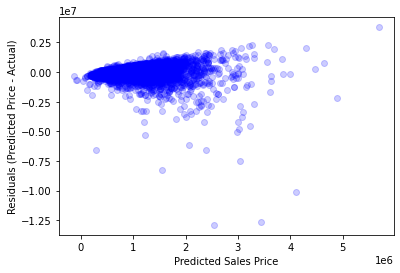

In [42]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel = 'Predicted Sales Price',
        ylabel = 'Residuals (Predicted Price - Actual)')
ax2.scatter(x=y_hat, y=y_hat-y, color='blue', alpha=0.2)

It appears that for the most part, the model is understimating some Prices. However, for the most part it appears to be homescedastic.

To be sure though, let's run a statistical test.

In [43]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, second_floor_no_0[['SqFtTotLiving','sqfeet_feature']])
print('Lagrange Multiplier p-value:', lm_p_value)
print('F-statistic p_value:', f_p_value)

Lagrange Multiplier p-value: 1.8302637934502998e-69
F-statistic p_value: 2.2137080633916038e-69


Since the p_value appears to be very low, this would means that we reject our null hypothesis and the current model violates the homoscedasticity.

Let's check the independence of the features.

In [44]:
rows = second_floor_no_0[['SqFtTotLiving', 'sqfeet_feature']].values

vif_df = pd.DataFrame()
vif_df['VIF'] = [variance_inflation_factor(rows,i) for i in range(2)]
vif_df['feature'] = ['SqFtTotLiving','sqfeet_feature']

vif_df

,VIF,feature
0,41.520511,SqFtTotLiving
1,41.520511,sqfeet_feature


It appears as though our variance inflation factor is _very_ high and we are violating our independence assumption.

# Summary #

We started of with a baseline model where the only input feature was `SqFtTotLiving` to see how it affected the `SalePrice`. This model had an R-squared of 0.38. The model violated the lineary assumtion since it had a p value of 0.052. The normality p-value was 0 therefore did not violate the normality assumptions.

The final model had 2 features, one which was engineered which was `SqFtTotLiving` and `sqfeet_feature`. It had an R-Squared of 0.42 which was a slight increase over the the previous model. The model was inline with the Linearity assumption. Although it had a high JB value its p-value was 0 and therefore inline with the normality assumption. The homoscedasticity was low and therefore violated the homoscedasticity assumption. For the most part the homoscedasticity showed the model underestimating some of the SalePrice.

Because only 3 features that were used explained 42% of the data, it indicated that although it did have some exaplanatory power, it clearly required more analysis to understand what other factors had more inpact on the model.

While investigating SalePrice and the features that played a factor on its variability, we investigated `SqFt1stFloor`. We found that `SqFt1stFloor` had a positive correlation with `SalePrice`. For each increase of 1 in `SqFt1stFloor`, the `SalePrice` increased by 707.94. 

When looking at `SqFt1stFloor` in the simple model we found that `SqFt1stFloor` had a positive correlation on `SalePrice`. For each increase of 1 in `SqFt1stFloor`, the `SalePrice` increased by `474.5492`

## Conclusion ##

Based on the findings throughout the project, and the inferences made in the summary, the most logical conclusion is to recommend to have house projects that increase the `SqFtTotLiving` and `SqFt1stFloor`. However, it is important to note that the `Total Living Space in feet` and the `Square feet of the 1st Floor` is correlated, and relates to each other.

Therefore, overall, adding living space to a house should substantially increase the valuation of the house based on historical `SalePrice`.